In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from collections import Counter
import seaborn as sns
import scienceplots
plt.style.use(['science', 'nature'])

In [2]:
G = nx.read_graphml("../gephi/all_qualifier_norm_newcolor.graphml")

In [3]:
print(G.number_of_nodes())
print(G.number_of_edges())

76
2842


In [4]:
G_commented = nx.read_graphml("../gephi/commented_qualifier_norm_newcolor.graphml")
print(G_commented.number_of_nodes())
print(G_commented.number_of_edges())

76
2684


In [5]:
weights_all = [G[i][j]['weight'] for i, j in G.edges()]
weights_commented = [G_commented[i][j]['weight'] for i, j in G_commented.edges()]

边权重分布

In [6]:
# plt.figure(dpi=300)
# sns.histplot(weights_all, log_scale=(True, True), label='all')
# sns.histplot(weights_commented, log_scale=(True, True), label='commented')
# plt.legend()
# plt.show()

In [7]:
# 将节点按照模块化类别分组，并计算每个类别的normalized_weighted_degree值
modularity_classes = nx.get_node_attributes(G, 'Modularity Class')
normalized_weighted_degrees = nx.get_node_attributes(G, 'normalized_weighted_degree')
grouped_degrees = {mod_class: [] for mod_class in set(modularity_classes.values())}
for node, mod_class in modularity_classes.items():
    grouped_degrees[mod_class].append(normalized_weighted_degrees[node])
grouped_degrees

{0: [1.0,
  0.13255844593013388,
  0.19086521413032453,
  0.04793791329053931,
  0.5565493803338121,
  0.24159077996807687,
  0.10732899530080714,
  0.02536294948013732,
  0.012441543243384146,
  0.06864072852563137,
  0.016368474816853402,
  0.18468454213225396,
  0.012691551696368148,
  0.12226729184880834,
  0.4326956757531942,
  0.08958472446686655,
  0.29096211947206074,
  0.11259283083688539,
  0.022648084204046206,
  0.020913515230445,
  0.03231646572993724,
  0.023933354175699147,
  0.020304650540316403,
  0.04828710897453728,
  0.020612372470288385,
  0.018878136619209476,
  0.0005655587622299688,
  0.006712002421134492],
 1: [0.2174897818830317,
  0.6851738158368779,
  0.5422349389894429,
  0.0908295200520604,
  0.11502554133659083,
  0.08720006689100247,
  0.355256265326759,
  0.038088896076932645,
  0.03340860791928841,
  0.005343368538276694],
 2: [0.4106751943811558,
  0.4329526797791464,
  0.19808489527543985,
  0.0008379697048384547],
 3: [0.004332508244366024,
  0.1762

In [8]:
modularity_classes2 = nx.get_node_attributes(G_commented, 'Modularity Class')
normalized_weighted_degrees2 = nx.get_node_attributes(G_commented, 'normalized_weighted_degree')
grouped_degrees2 = {mod_class: [] for mod_class in set(modularity_classes2.values())}
for node, mod_class in modularity_classes2.items():
    grouped_degrees2[mod_class].append(normalized_weighted_degrees2[node])
grouped_degrees2

{0: [1.0,
  0.047083949859013374,
  0.27686772383371955,
  0.020118512521287584,
  0.6146580725313381,
  0.3741921187079483,
  0.043435397414779864,
  0.008958234456573327,
  0.017909489377146207,
  0.02716435411373852,
  0.015088011948965632,
  0.2567160585164298,
  0.009260099388592647,
  0.039875834054552056,
  0.5947768642340657,
  0.06124717328791982,
  0.010823515452692705,
  0.39456538429325216,
  0.07840287277701778,
  0.007684469136491806,
  0.006569488260420447,
  0.011280675060721963,
  0.024262612021552808,
  0.018914542561210532,
  0.01107826851670901,
  0.012564909684804153,
  0.020375010469304,
  0.045298933526899135],
 1: [0.09441916301404282,
  0.256890546916441,
  0.2574750830564784,
  0.05763177363968843,
  0.06986515536447137,
  0.0,
  0.030296420893938972,
  0.1251186521120076,
  0.02797921494179067,
  0.0038876015522488067],
 2: [0.7374071721711941,
  0.5436238448867919,
  0.35749008905887936,
  0.004219129512270024],
 3: [0.009212987520589631,
  0.274901239565593

1 0.7109736926245953
2 0.041674646228570436
3 0.1120775221151519
4 

0.0021184043796355924


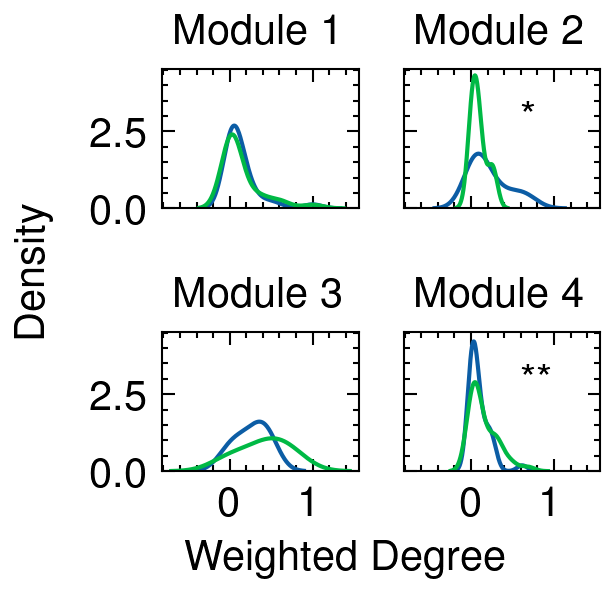

In [14]:
fig, axes=plt.subplots(2,2, sharex=True, sharey=True,dpi=300, layout="tight", figsize=(2,2))
fig.set_dpi(300)
for i in range(4):
    row, col = i//2, i%2
    ax = axes[row][col]
    sns.kdeplot(grouped_degrees[i], label='Baseline', ax=ax)
    sns.kdeplot(grouped_degrees2[i], label='Commented', ax=ax)
    
    t_statistic, p_value = stats.ttest_rel(grouped_degrees[i], grouped_degrees2[i])
    print(i+1, p_value)
    
    # axes[row].set_xlim(0,0.05)
    ax.set_ylabel("")
    ax.set_title(f"Module {i+1}", fontsize=10)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
    if i+1 == 2:
        ax.text(x=0.6, y=2.6, s="*" , fontsize=10)
    elif i+1 == 4:
        ax.text(x=0.6, y=2.6, s="**" , fontsize=10)
        

# fig.legend(["Baseline", "Commented"], bbox_to_anchor=(1.8, 0.2), fontsize=10)
fig.text(0.5, 0, 'Weighted Degree', ha='center')
fig.text(-0.05, 0.5, 'Density', va='center', rotation='vertical', fontsize=10)

plt.show()

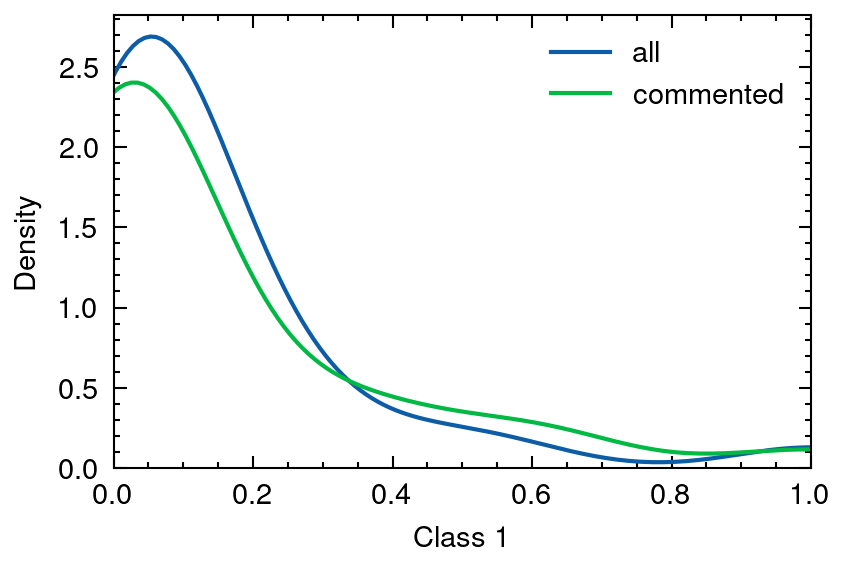

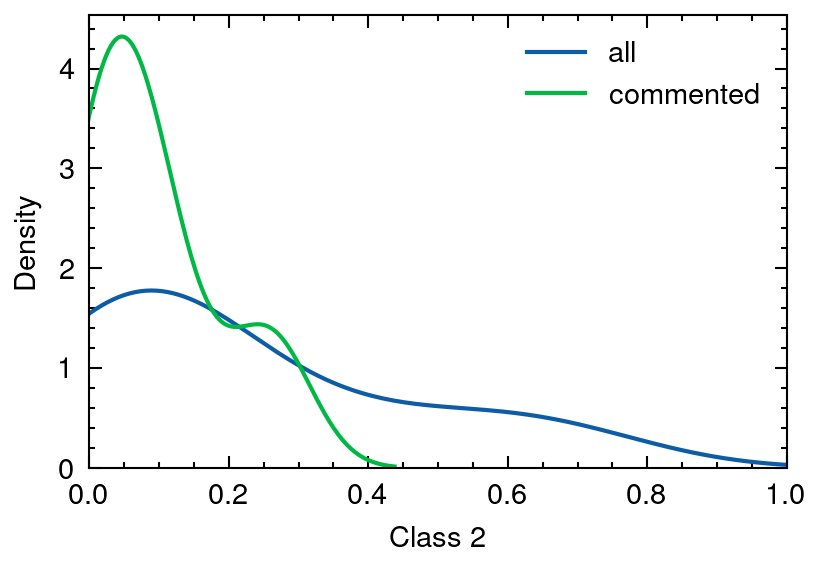

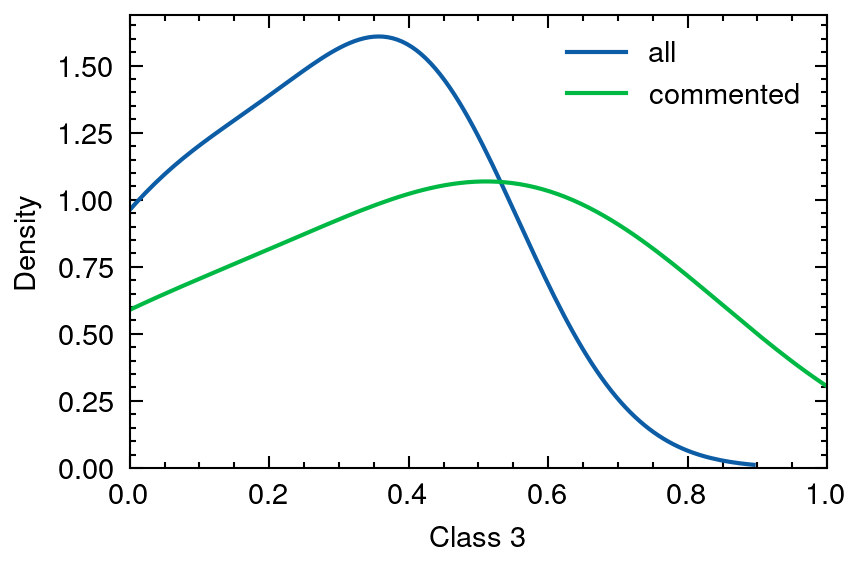

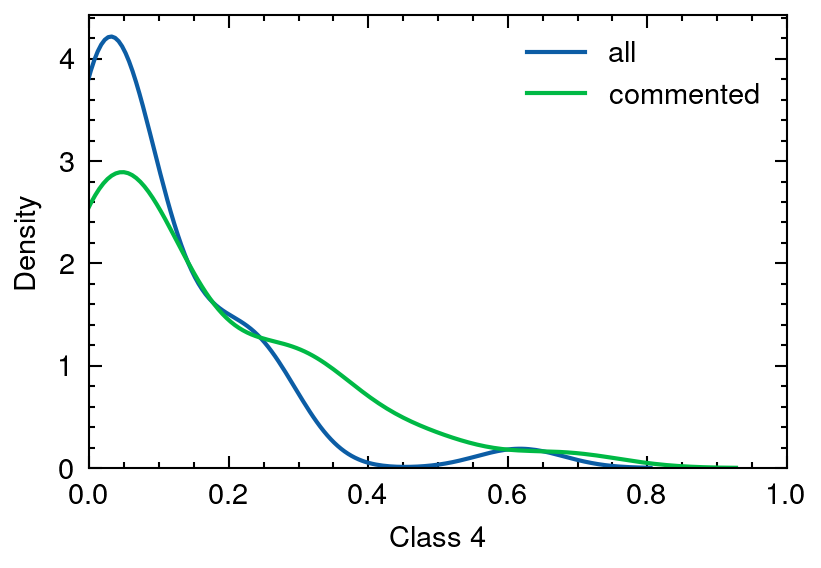

In [10]:
for i in range(4):
    plt.figure(dpi=300, figsize=(3,2))
    sns.kdeplot(grouped_degrees[i], label='all')
    sns.kdeplot(grouped_degrees2[i], label='commented')
    plt.xlim(0,1)
    plt.xlabel(f"Class {i+1}")
    plt.legend()
    plt.show()

In [11]:
modularity_classes = nx.get_node_attributes(G, 'Modularity Class')
normalized_weighted_degrees = nx.get_node_attributes(G, 'normalized_weighted_degree')
grouped_degrees = {mod_class: [] for mod_class in set(modularity_classes.values())}
for node, mod_class in modularity_classes.items():
    grouped_degrees[mod_class].append(normalized_weighted_degrees[node])
grouped_degrees

{0: [1.0,
  0.13255844593013388,
  0.19086521413032453,
  0.04793791329053931,
  0.5565493803338121,
  0.24159077996807687,
  0.10732899530080714,
  0.02536294948013732,
  0.012441543243384146,
  0.06864072852563137,
  0.016368474816853402,
  0.18468454213225396,
  0.012691551696368148,
  0.12226729184880834,
  0.4326956757531942,
  0.08958472446686655,
  0.29096211947206074,
  0.11259283083688539,
  0.022648084204046206,
  0.020913515230445,
  0.03231646572993724,
  0.023933354175699147,
  0.020304650540316403,
  0.04828710897453728,
  0.020612372470288385,
  0.018878136619209476,
  0.0005655587622299688,
  0.006712002421134492],
 1: [0.2174897818830317,
  0.6851738158368779,
  0.5422349389894429,
  0.0908295200520604,
  0.11502554133659083,
  0.08720006689100247,
  0.355256265326759,
  0.038088896076932645,
  0.03340860791928841,
  0.005343368538276694],
 2: [0.4106751943811558,
  0.4329526797791464,
  0.19808489527543985,
  0.0008379697048384547],
 3: [0.004332508244366024,
  0.1762